# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

### Brainstormed Hypotheses : 
- Applicants of a certain gender? (Men)
- Applicants who are married?
- Applicants with fewer dependents?
- Are self-employed applicants less likely to be approved?
- Applicants with lower loan amounts?
- Applicants with longer term amounts (bank will get more interest)?


## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.**

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [204]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Columns With Null Values:
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

**Look at some basic statistics for numerical variables.**

In [205]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)**

In [206]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [207]:
print(f'# of Applicants With A Credit History: {df.Credit_History.value_counts()[1]}')
print(f'% of Applicants With A Credit History: {round(df.Credit_History.value_counts()[1]/len(df.Credit_History) * 100,2)}%')
print(f'# of Applicants Without A Credit History: {df.Credit_History.value_counts()[0]}')
print(f'% of Applicants Without A Credit History: {round(df.Credit_History.value_counts()[0]/len(df.Credit_History) * 100,2)}%')

# of Applicants With A Credit History: 475
% of Applicants With A Credit History: 77.36%
# of Applicants Without A Credit History: 89
% of Applicants Without A Credit History: 14.5%


**2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?**

**3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.**

In [208]:
df[['ApplicantIncome','CoapplicantIncome']].describe()

,ApplicantIncome,CoapplicantIncome
count,614.000000,614.000000
mean,5403.459283,1621.245798
std,6109.041673,2926.248369
min,150.000000,0.000000
25%,2877.500000,0.000000
50%,3812.500000,1188.500000
75%,5795.000000,2297.250000
max,81000.000000,41667.000000


In [209]:
print(f'Median Applicant Income: {df.ApplicantIncome.median()}')
print(f'Mean Applicant Income: {df.ApplicantIncome.mean()}')

Median Applicant Income: 3812.5
Mean Applicant Income: 5403.459283387622


In [210]:
print(f'Median Co-Applicant Income: {df.CoapplicantIncome.median()}')
print(f'Mean Co-Applicant Income: {df.CoapplicantIncome.mean()}')

Median Co-Applicant Income: 1188.5
Mean Co-Applicant Income: 1621.245798027101


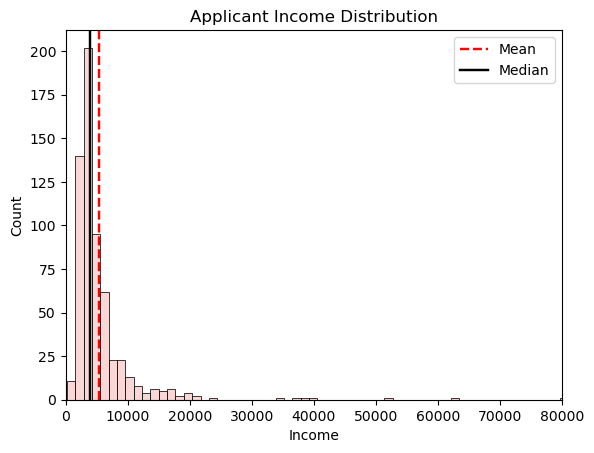

In [211]:
x=df['ApplicantIncome']
fig, ax = plt.subplots()
sns.histplot(
    data=df['ApplicantIncome'],
    bins=60,
    color='#F7CAC9',
    ax=ax)
plt.axvline(x.mean(), color='red',label='Mean', ls='--', lw=1.75)
plt.axvline(x.median(),color='black', label='Median', lw=1.75)
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
ax.set_xlim(0,80000)
plt.legend()
plt.show()

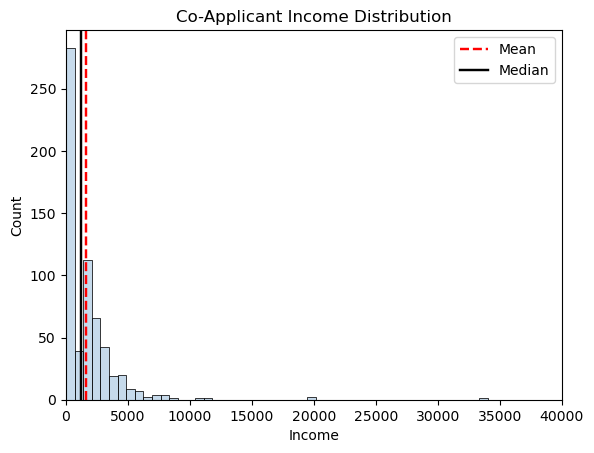

In [212]:
fig, ax = plt.subplots()
x=df['CoapplicantIncome']
sns.histplot(
    data=df['CoapplicantIncome'],
    bins=60,
    color='#B3CEE5',
    ax=ax)
plt.axvline(x.mean(), color='red',label='Mean', ls='--', lw=1.75)
plt.axvline(x.median(),color='black', label='Median', lw=1.75)
plt.title('Co-Applicant Income Distribution')
plt.xlabel('Income')
ax.set_xlim(0,40000)
plt.legend()
plt.show()

The data is heavily skewed right for both the applicant, and the co-applicant. However, this is about in line with what I expected. Although there are some people with higher incomes that are applying for loans, the majority appear to be low-income. Assuming most of these are mortages (property location, term lengths, loan amounts), and the co-applicants are the person with the lower income.

The high-income outliers are increasing the value of the mean and are not indicative of the actual data.

**Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.**

In [213]:
df_nominal = df.select_dtypes(include=['object'])

In [214]:
print('Total Unique Values Per Nominal Variable:')
print('------------------------------------------------')
df_nominal.nunique()

Total Unique Values Per Nominal Variable:
------------------------------------------------


Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

**Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.**

In [215]:
# Dropping Loan_ID
df_nominal.drop(columns='Loan_ID', inplace=True)

In [216]:
# Looking at frequency of categories (text-only)

In [217]:
"""
Looping through the values in the inputted dataframe to return unique values.
"""
def unique_values(df):
    columns = df.columns
    for col in columns:
        print(df.groupby(col, dropna=False).size())
        print('------------------------------------------------')

In [218]:
print('Frequency of Categories Within Nominal Variables:')
print('------------------------------------------------')
unique_values(df_nominal)

Frequency of Categories Within Nominal Variables:
------------------------------------------------
Gender
Female    112
Male      489
NaN        13
dtype: int64
------------------------------------------------
Married
No     213
Yes    398
NaN      3
dtype: int64
------------------------------------------------
Dependents
0      345
1      102
2      101
3+      51
NaN     15
dtype: int64
------------------------------------------------
Education
Graduate        480
Not Graduate    134
dtype: int64
------------------------------------------------
Self_Employed
No     500
Yes     82
NaN     32
dtype: int64
------------------------------------------------
Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64
------------------------------------------------
Loan_Status
N    192
Y    422
dtype: int64
------------------------------------------------


In [219]:
# Looking at frequency of categories (visual)

In [220]:
sns.set_palette(palette='colorblind')

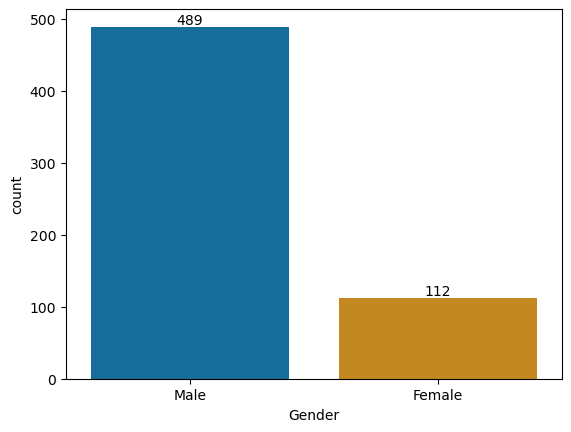

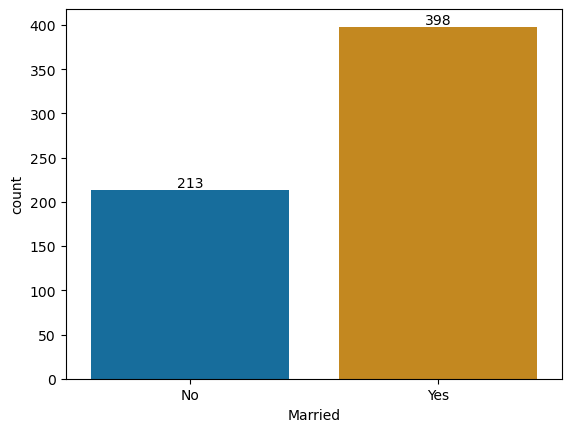

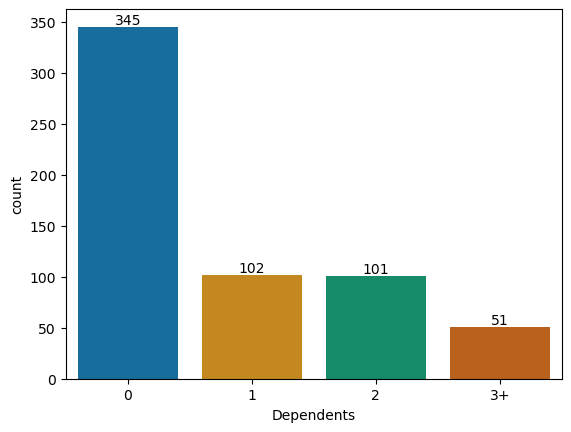

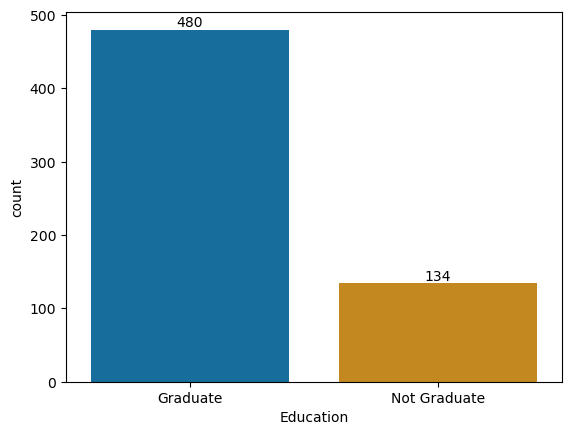

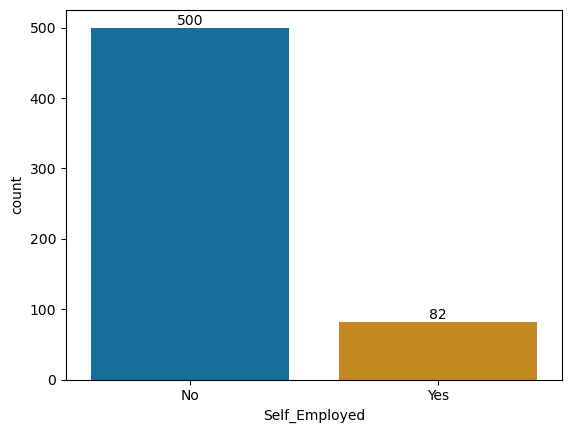

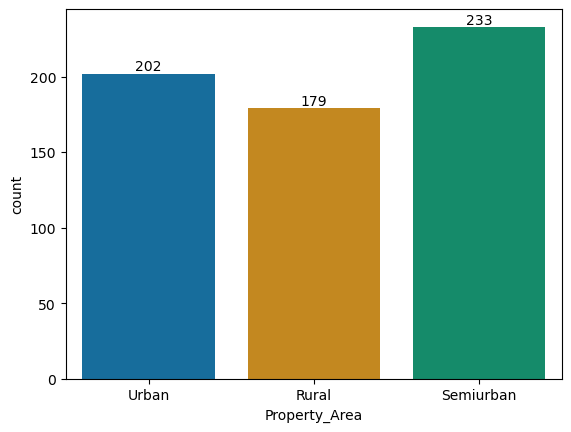

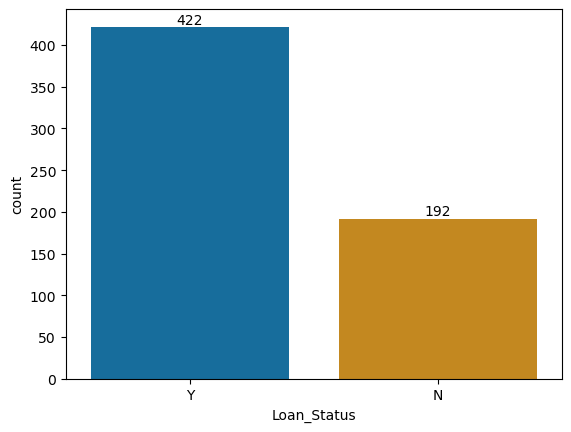

In [221]:
# looping through all of our nominal data and creating countplots for each
for col in df_nominal:
    ax = sns.countplot(
        x=df_nominal[col], 
        data = df_nominal)
    ax.bar_label(ax.containers[0])
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [222]:
df.ApplicantIncome.max()

81000

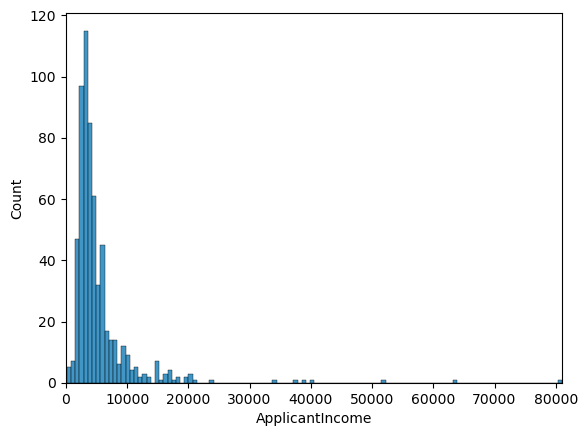

In [223]:
# no binning
fig, ax = plt.subplots()
sns.histplot(
        data=df, 
        x='ApplicantIncome')
ax.set_xlim(0,81000)
plt.show()

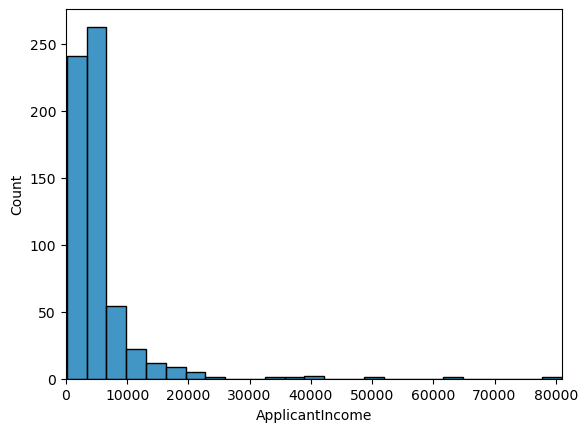

In [224]:
# 25 bins
fig, ax = plt.subplots()
sns.histplot(
        data=df, 
        x='ApplicantIncome',
        bins=25)
ax.set_xlim(0,81000)
plt.show()

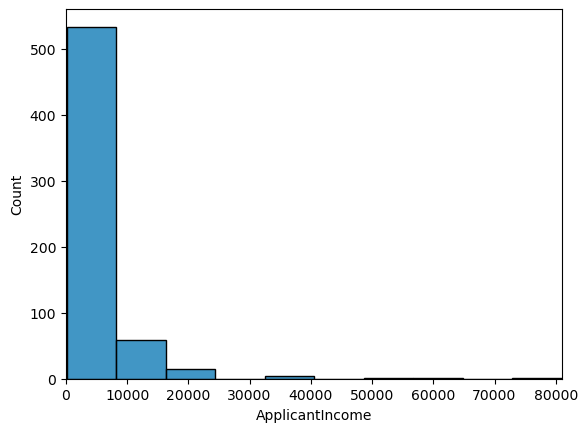

In [225]:
# 10 bins
fig, ax = plt.subplots()
sns.histplot(
        data=df, 
        x='ApplicantIncome',
        bins=10)
ax.set_xlim(0,81000)
plt.show()

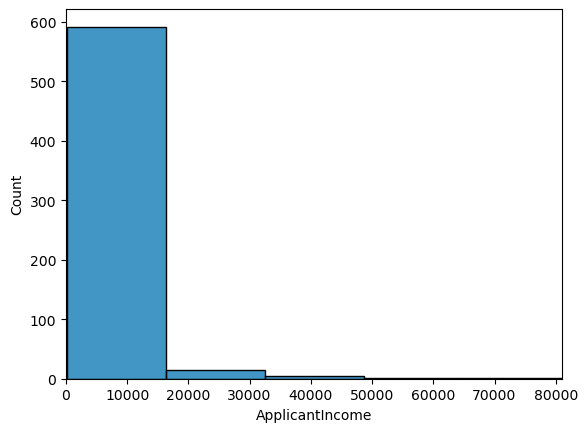

In [226]:
# 5 bins
fig, ax = plt.subplots()
sns.histplot(
        data=df, 
        x='ApplicantIncome',
        bins=5)
ax.set_xlim(0,81000)
plt.show()

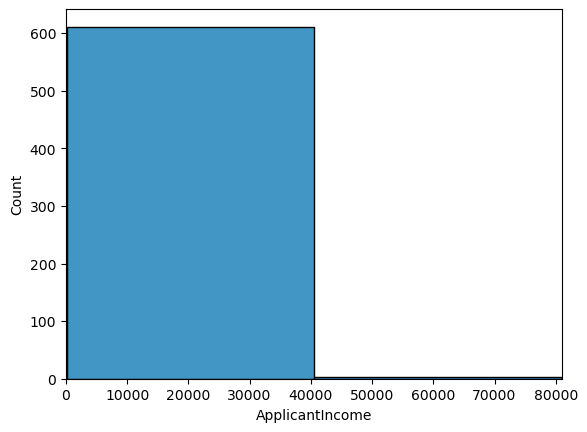

In [227]:
# 2 bins
fig, ax = plt.subplots()
sns.histplot(
        data=df, 
        x='ApplicantIncome',
        bins=2)
ax.set_xlim(0,81000)
plt.show()

**Look at box plots to understand the distributions.**

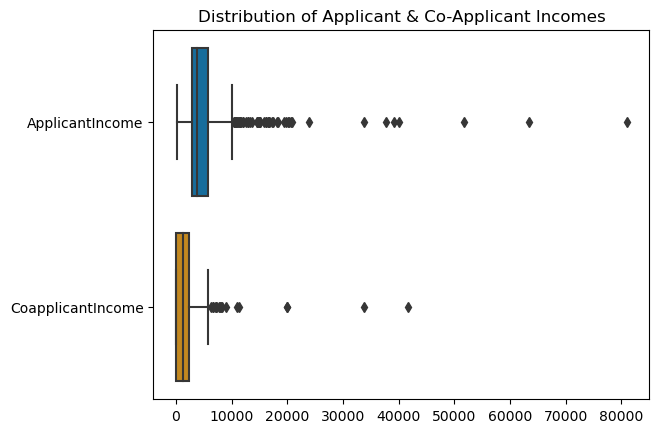

In [228]:
sns.boxplot(
    data=df[['ApplicantIncome', 'CoapplicantIncome']],
    orient='h').set(title='Distribution of Applicant & Co-Applicant Incomes')
plt.show()

**Look at the distribution of income segregated  by `Education`**

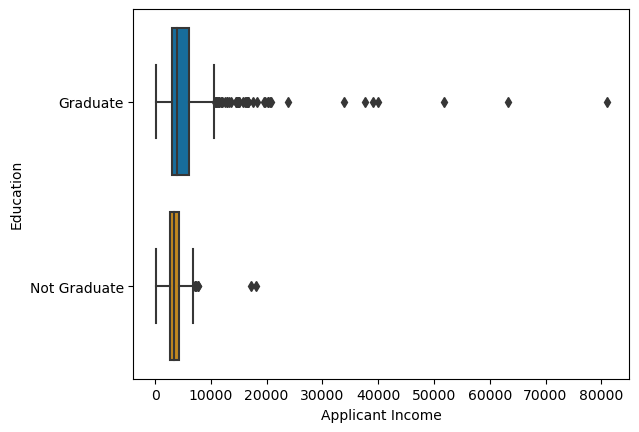

In [229]:
sns.boxplot(data= df,
            x='ApplicantIncome', 
            y='Education').set(xlabel='Applicant Income')
plt.show()

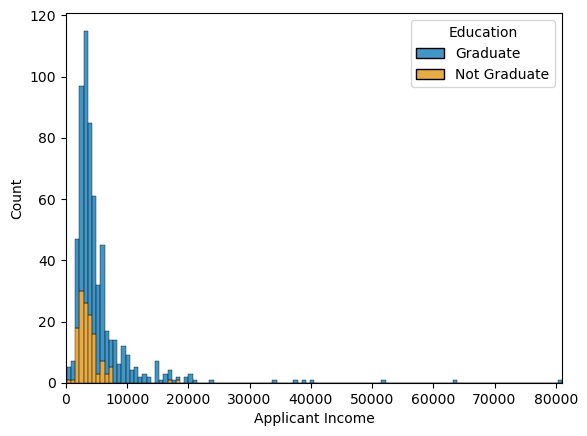

In [230]:
# no binning
fig, ax = plt.subplots()
sns.histplot(
            data=df,
            x='ApplicantIncome',
            hue='Education',
            multiple='stack').set(xlabel='Applicant Income')
ax.set_xlim(0,81000)
plt.show()

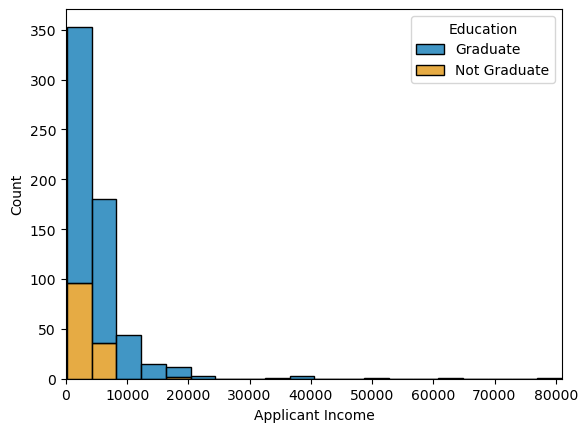

In [231]:
# 20 bins
fig, ax = plt.subplots()
sns.histplot(
            data=df,
            x='ApplicantIncome',
            hue='Education',
            multiple='stack',
            bins=20).set(xlabel='Applicant Income')
ax.set_xlim(0,81000)
plt.show()

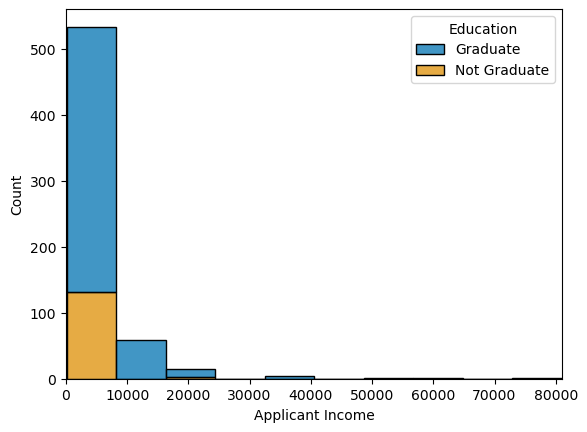

In [232]:
# 10 bins
fig, ax = plt.subplots()
sns.histplot(
            data=df,
            x='ApplicantIncome',
            hue='Education',
            multiple='stack',
            bins=10).set(xlabel='Applicant Income')
ax.set_xlim(0,81000)
plt.show()

**Look at the histogram and boxplot of LoanAmount**

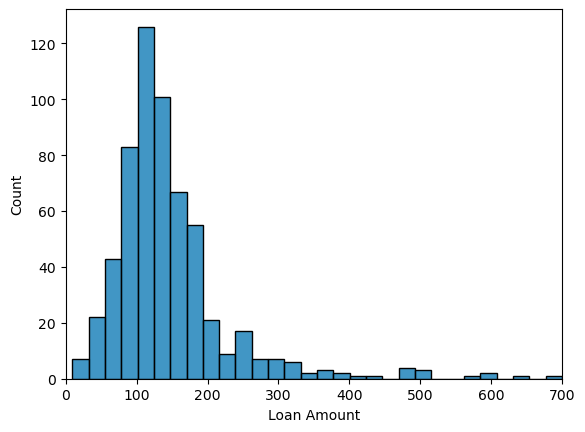

In [233]:
fig, ax = plt.subplots()
sns.histplot(
            data=df,
            x='LoanAmount',
            bins=30).set(xlabel='Loan Amount')
ax.set_xlim(0,700)
plt.show()

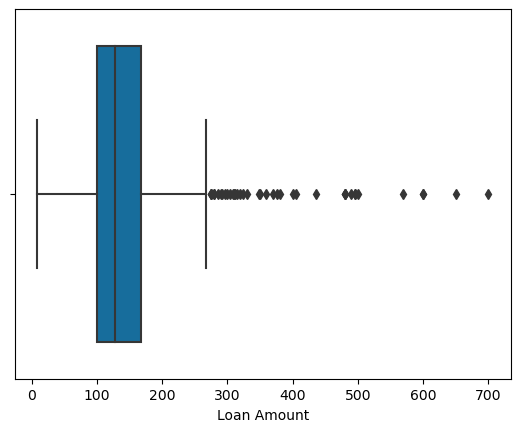

In [234]:
sns.boxplot(data = df,
            x='LoanAmount').set(xlabel='Loan Amount')
plt.show()

**There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding.**

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [235]:
df_nominal.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


**Are men more likely to be approved than women?**

In [236]:
# Approval of Loans vs Gender
pd.pivot_table(df,
              values='LoanAmount',
              index=['Gender','Married'],
              columns='Loan_Status',
              aggfunc='count',
              margins=True,
              margins_name='Total')

Loan_Status       N    Y  Total
Gender Married                 
Female No        28   50     78
       Yes        8   23     31
Male   No        46   79    125
       Yes       94  249    343
Total           176  401    577

In [237]:
print(f'{round(((23/31)*100),2)}% of married women & {round(((50/78)*100),2)}% of unmarried women are getting approved for loans')
print(f'{round((((50+23) / (78+31))*100),2)}% of women are getting approved for loans')

print(f'{round(((249/343)*100),2)}% of married men & {round(((79/125)*100),2)}% of unmarried men are getting approved for loans')
print(f'{round((((79+249) / (125+343))*100),2)}% of men are getting approved for loans')

74.19% of married women & 64.1% of unmarried women are getting approved for loans
66.97% of women are getting approved for loans
72.59% of married men & 63.2% of unmarried men are getting approved for loans
70.09% of men are getting approved for loans


*It would appear that men overall are more likely to be approved for loans, but there are also many more men in this data, which could be skewing the dat*

**Are married applicants more likely to get approval?**

In [238]:
# Loan status of married & single people v income & loan amounts
marriage_table = pd.pivot_table(
            df,
            index=['Loan_Status'],
            columns=['Married'],
            values=['LoanAmount'],
            aggfunc=('count','mean'))
            
marriage_table.stack()

LoanAmount            
                         count        mean
Loan_Status Married                       
N           No              75  134.906667
            Yes            106  162.764151
Y           No             131  125.435115
            Yes            278  153.075540

In [239]:
# having an issue with the totals showing up. For reference, (in relation to valid loan statuses):
# total married = 384, total not married = 206
print(f'{round(((278/384)*100),2)}% of married people are getting approved for loans')
print(f'{round(((131/206)*100),2)}% of unmarried people are getting approved for loans')

72.4% of married people are getting approved for loans
63.59% of unmarried people are getting approved for loans


*More married applicants are being approved. Again, imbalanced data could lead to bias*

**Are applicants with fewer dependents more likely to be approved?**

In [240]:
# Dependents

In [241]:
kids_table = pd.pivot_table(
            df,
            index=['Dependents'],
            columns='Loan_Status',
            values='LoanAmount',
            aggfunc='count',
            margins=True,
            margins_name='Total'
            )
kids_table

Loan_Status,N,Y,Total
Dependents,,,
0,101,233,334
1,35,63,98
2,23,75,98
3+,16,33,49
Total,175,404,579


In [242]:
print(f'{round(((233/334)*100),2)}% of people with 0 dependents are getting approved for loans')
print(f'{round(((63/98)*100),2)}% of people with 1 dependent are getting approved for loans')
print(f'{round(((75/98)*100),2)}% of people with 2 dependents are getting approved for loans')
print(f'{round(((33/49)*100),2)}% of people with 3+ dependents are getting approved for loans')

69.76% of people with 0 dependents are getting approved for loans
64.29% of people with 1 dependent are getting approved for loans
76.53% of people with 2 dependents are getting approved for loans
67.35% of people with 3+ dependents are getting approved for loans


*People with 2 children are getting approvals more than anyone else**

**Are people in urban areas more liekly to get loan approval?**

In [243]:
property_table = pd.pivot_table(
            df,
            index=['Property_Area'],
            columns='Loan_Status',
            values='LoanAmount',
            aggfunc='count',
            margins=True,
            margins_name='Total'
            )
property_table

Loan_Status,N,Y,Total
Property_Area,,,
Rural,66,107,173
Semiurban,53,175,228
Urban,62,129,191
Total,181,411,592


In [244]:
print(f'{round(((107/173)*100),2)}% of rural properties are getting approved for loans')
print(f'{round(((175/228)*100),2)}% of semiurban properties are getting approved for loans')
print(f'{round(((129/191)*100),2)}% of urban properties are getting approved for loans')

61.85% of rural properties are getting approved for loans
76.75% of semiurban properties are getting approved for loans
67.54% of urban properties are getting approved for loans


*Houses in the suburbs are getting more approvals*

**Are self-employed applicants less likely to be approved?**

In [245]:
# Employment & Education
empl_table = pd.pivot_table(
            df,
            index=['Self_Employed','Education'],
            columns='Loan_Status',
            values='LoanAmount',
            aggfunc=('count','mean')
            )
empl_table

count             mean            
Loan_Status                    N    Y           N           Y
Self_Employed Education                                      
No            Graduate       109  269  160.412844  144.293680
              Not Graduate    39   65  118.923077  113.615385
Yes           Graduate        18   44  162.333333  190.386364
              Not Graduate     7   10  141.000000  130.200000

In [246]:
print(f'{round(((54/79)*100),2)}% of self-employed people are getting approved for loans')
print(f'{round(((44/62)*100),2)}% of self-employed people with a graduate degree and \
{round(((10/17)*100),2)}% without a graduate degree getting approved for loans')


print(f'{round(((334/482)*100),2)}% of employed people are getting approved for loans')
print(f'{round(((269/378)*100),2)}% of employed people with a graduate degree and \
{round(((65/104)*100),2)}% without a graduate degree getting approved for loans')


68.35% of self-employed people are getting approved for loans
70.97% of self-employed people with a graduate degree and 58.82% without a graduate degree getting approved for loans
69.29% of employed people are getting approved for loans
71.16% of employed people with a graduate degree and 62.5% without a graduate degree getting approved for loans


- *Data appears to mostly people that have been approved, in general.*
- *Employment status does not appear to be weighted as much as education when it comes to approvals*

**Are applicants with lower loan amounts more likely to be approved?**

In [247]:
# Loan Amounts
loan_amount_table = pd.pivot_table(
            df,
            columns='Loan_Status',
            values='LoanAmount',
            aggfunc=('count','mean', 'median'))
loan_amount_table

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
median,129.000000,126.000000


*From the data we have, it would appear that a higher percentage of approved loans have lower loan amounts*

*Not checking about long vs short term amounts since we could see from checking numerical values, that the majority of loan term amouns are the same length (360 months)*

*Looking at some general comparisons*

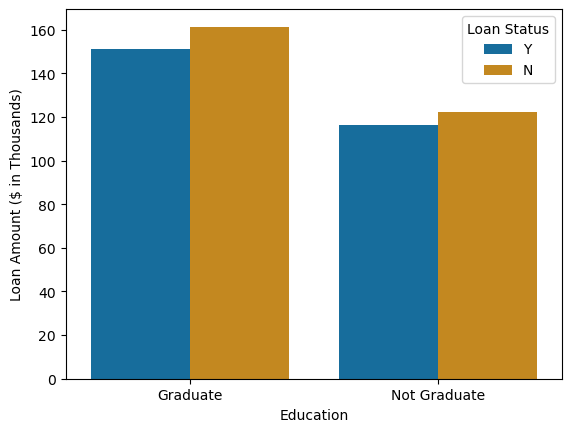

In [248]:
sns.barplot(
            data=df,
            x='Education',
            y='LoanAmount',
            hue='Loan_Status',
            ci=None
            ).set(ylabel='Loan Amount ($ in Thousands)')
plt.legend(title='Loan Status')
plt.show()

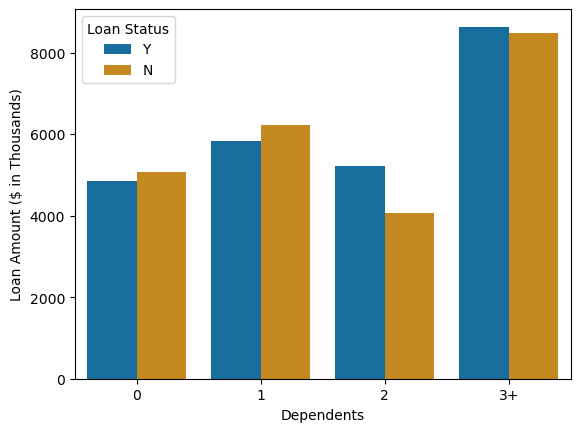

In [249]:
sns.barplot(
            data=df,
            x='Dependents',
            y='ApplicantIncome',
            hue='Loan_Status',
            ci=None
            ).set(ylabel='Loan Amount ($ in Thousands)')
plt.legend(title='Loan Status')
plt.show()

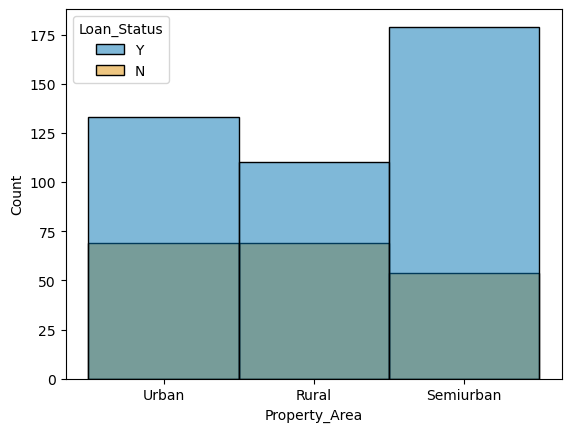

In [250]:
fig, ax = plt.subplots()
sns.histplot(
            data=df,
            x='Property_Area',
            hue='Loan_Status'
            )
plt.show()

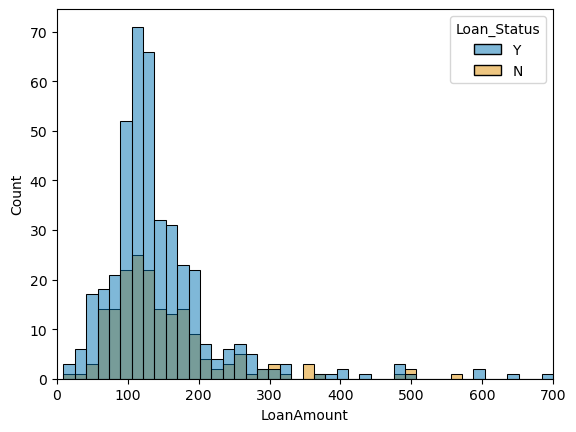

In [251]:
fig, ax = plt.subplots()
sns.histplot(
            data=df,
            x='LoanAmount',
            hue='Loan_Status'
            )
ax.set_xlim(0,700)
plt.show()

## Possible Biases:
- More male applicants skewing gender
- Most data is for approved loans, which will also cause a bias

## Possible Solutions:
- Data needs to be balanced
    - this hasn't really been covered in this bootcamp and this is a project that was completed overnight. Biases are not being fixed just for the sake of time at the moment.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [51]:
# Replacing NaNs with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [57]:
# replacing NaNs with mode 
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [58]:
# Making sure all Nulls are gone!
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [113]:
# Checking for zeros in places that don't make sense

In [257]:
df[df['Loan_Amount_Term']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [258]:
df[df['LoanAmount']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [259]:
df[df['ApplicantIncome']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

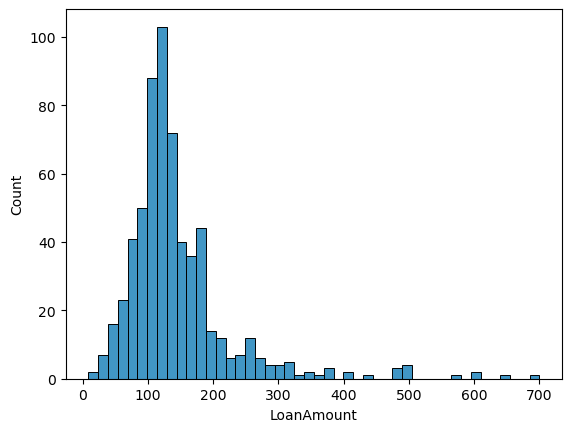

In [260]:
sns.histplot(df['LoanAmount'])
plt.show()

In [261]:
df['Log_LoanAmount'] = np.log(df['LoanAmount'])

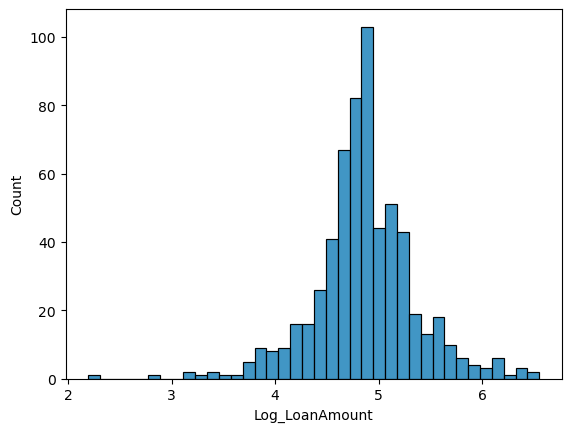

In [262]:
sns.histplot(df['Log_LoanAmount'])
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [263]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [264]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

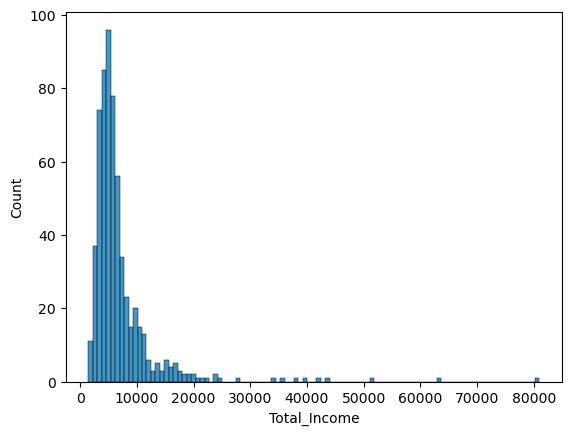

In [265]:
sns.histplot(df['Total_Income'])
plt.show()

In [266]:
df['Log_Total_Income'] = np.log(df['Total_Income'])

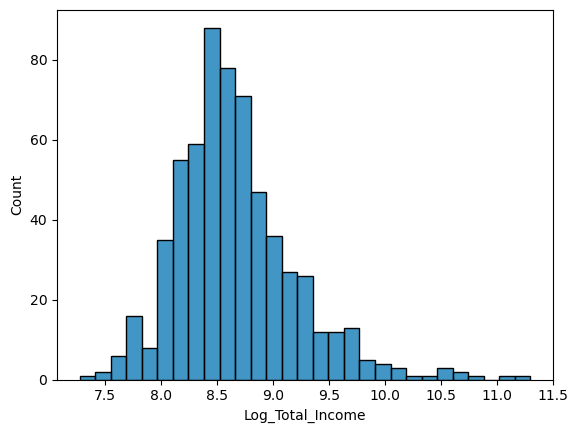

In [267]:
sns.histplot(df['Log_Total_Income'])
plt.show()

In [268]:
# saving changes
df.to_csv('../data/cleaned_loan_data.csv', index=False)

In [6]:
def totalIncome(df):
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    return df

In [37]:
## Creating a function that performs above steps
def cleaner(df):
    df['Dependents'].fillna(0, inplace=True)
    df['Credit_History'].fillna(0, inplace=True)
    df['Married'].fillna('No',inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    df['Gender'].fillna('Other', inplace=True)
    df['Self_Employed'] = df['Self_Employed'].fillna('No')
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)
    df['Log_LoanAmount'] = np.log(df['LoanAmount'])
    totalIncome(df)
    df['Log_Total_Income'] = np.log(df['Total_Income'])
    return df    

## 4. Building a Predictive Model

In [117]:
df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [152]:
# Importing packages
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import xgboost
from xgboost import XGBClassifier


import pickle

In [153]:
# making a copy just for initial testing
# this is mostly for convenience, as we'll be performing transformations on the data
df_testing = df.copy()

In [ ]:
cleaner(df_testing)

In [155]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Log_LoanAmount     614 non-null    float64
 14  Total_Income       614 non-null    float64
 15  Log_Total_Income   614 non-null    float64
dtypes: float64(7), int64(1), o

In [156]:
# dropping non-logged features
df_testing.drop(columns=['LoanAmount','Total_Income', 'Loan_ID'], inplace=True)

In [157]:
num_feat = list(df_testing.select_dtypes(include=['float','int']))
cat_feat = list(df_testing.select_dtypes(include=['object']))

In [158]:
cat_feat.append('Credit_History')
num_feat.remove('Credit_History')

In [159]:
cat_feat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [160]:
num_feat

['ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Log_LoanAmount',
 'Log_Total_Income']

In [161]:
# scaling numeric features
scaler = StandardScaler()

df_testing[num_feat] = scaler.fit_transform(df_testing[num_feat])

# getting dummies for categorical data
df_testing = pd.get_dummies(df_testing, columns=cat_feat, drop_first=True)

In [162]:
num_feat

['ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Log_LoanAmount',
 'Log_Total_Income']

In [163]:
cat_feat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [164]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    float64
 1   CoapplicantIncome        614 non-null    float64
 2   Loan_Amount_Term         614 non-null    float64
 3   Log_LoanAmount           614 non-null    float64
 4   Log_Total_Income         614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Gender_Other             614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Dependents_0             614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Dependents_3+            614 non-null    uint8  
 12  Education_Not Graduate   614 non-null    uint8  
 13  Self_Employed_Yes        614 non-null    uint8  
 14  Property_Area_Semiurban  6

In [165]:
X = df_testing.drop(columns=['Loan_Status_Y'])
y = df_testing['Loan_Status_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
print(f'{len(X_train)} training samples and {len(X_test)} test samples')

429 training samples and 185 test samples


In [167]:
# Fitting Logistic Regression to the Training set
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [168]:
# Fitting Logistic Regression to the Training set
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
acc = round((accuracy_score(y_test, y_pred)*100),2)
C = confusion_matrix(y_test, y_pred)

print(f'Base set accuracy : {acc}')
print(f'Confusion matrix:\n {C}')

Base set accuracy : 73.51
Confusion matrix:
 [[ 25  40]
 [  9 111]]


### Confusion Matrix Results:
- 25 True negatives
- 40 False positives
- 9 False negatives
- 111 True positives

Not horrendous, but there is definitely room for improvement


### Pipelines

In [288]:
# using PowerTransformer for log transformation within pipeline, 
# as it doesn't throw an error like a normal log_transform does

In [170]:
log = PowerTransformer()

In [171]:
def totalIncome(df):
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    return df

In [172]:
def log_transform(df):
    log.fit(df[['Total_Income']])
    df['Total_Income'] = log.transform(df[['Total_Income']])
    return df

In [173]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Split dataset into Training set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [174]:
# categorical data transformation
cat_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')),
                          ('one-hot-encode', OneHotEncoder())])


In [175]:
# numeric data transformation
num_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')),
                           ('scaling', StandardScaler())])

In [176]:
# parameters
feature_select = FeatureUnion([('pca', PCA(n_components=2)),
                                       ('select_best', SelectKBest(k=1))])

In [177]:
pre_process = ColumnTransformer([ ('numeric', num_transform, ['Loan_Amount_Term','LoanAmount', 'ApplicantIncome','CoapplicantIncome','Total_Income']), 
                                    ('categorical', cat_transform, ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area'])
                                  ])

In [178]:
column_tranform = FunctionTransformer(totalIncome)
log_transformer = FunctionTransformer(log_transform, validate=False) 

In [179]:
# Final Pipeline
pipeline = Pipeline(steps=[('total_income', column_tranform),
                           ('log_transform', log_transformer),
                           ('pre_processor', pre_process),
                           ('features', feature_select),
                           ('classifier', LogisticRegression())])

In [180]:
pipeline

Pipeline(steps=[('total_income',
                 FunctionTransformer(func=<function totalIncome at 0x000001BFD9A80B80>)),
                ('log_transform',
                 FunctionTransformer(func=<function log_transform at 0x000001BFD4364CA0>)),
                ('pre_processor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'L...
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
    

In [181]:
regression_test = pipeline.fit(X_train, y_train)

In [184]:
y_pred = regression_test.predict(X_test)
acc = round((accuracy_score(y_test, y_pred)*100),2)
C = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {C}')



Accuracy: 84.86
Confusion matrix:
 [[ 32  26]
 [  2 125]]


### Confusion Matrix Results:
- 32 True negatives
- 26 False positives
- 2 False negatives
- 125 True positives

We've had an improvement in false negatives and positives!

Try paramater grid search to improve the results

In [ ]:
# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier' : [LogisticRegression(), RidgeClassifier(alpha=0.001), RidgeClassifier(alpha=0.01),
                              RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier()],
              'features__pca__n_components': [3, 5, 7, 9, 11],
              'features__select_best__k': [1, 3, 6]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

In [186]:
best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = round((grid.score(X_test, y_test)*100),2)
r2 = best_model.score(X_test, y_test)
C = confusion_matrix(y_test, y_pred)
print(f'Best Accuracy : {best_acc}')
print(f'Achieved With : {best_hyperparams}')
print(f'Test set r^2: {r2}')
print(f'Confusion matrix:\n {C}')

Best Accuracy : 84.86
Achieved With : {'classifier': LogisticRegression(), 'features__pca__n_components': 3, 'features__select_best__k': 1}
Test set r^2: 0.8486486486486486
Confusion matrix:
 [[ 32  26]
 [  2 125]]


### Confusion Matrix Results:
- 32 True negatives
- 26 False positives
- 2 False negatives
- 125 True positives

It seems as though our earlier parameters were already getting the best results. Which is suspicious, and I would like to investigate this more at a later time


In [303]:
# I'll take it (it is 2am)

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

### Pickling

In [30]:
best_model

Pipeline(steps=[('total_income',
                 FunctionTransformer(func=<function totalIncome at 0x00000234BD32EE50>)),
                ('log_transform',
                 FunctionTransformer(func=<function log_transform at 0x00000234BCA28D30>)),
                ('pre_processor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'L...
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
    

In [31]:
# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [32]:
# Display HTML representation in a jupyter context
from sklearn import set_config
set_config(display='diagram')

best_model

Pipeline(steps=[('total_income',
                 FunctionTransformer(func=<function totalIncome at 0x00000234BD32EE50>)),
                ('log_transform',
                 FunctionTransformer(func=<function log_transform at 0x00000234BCA28D30>)),
                ('pre_processor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'L...
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                                                ('select_best',
                                                 SelectKBest(k=1))])),
                ('classifier', LogisticRegression())])

In [ ]:
# Saving the HTML to a file
from sklearn.utils import estimator_html_repr

with open('model_pipeline.html', 'w') as f:  
    f.write(estimator_html_repr(best_model))

In [20]:
set_config(display='text')

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [5]:
import requests

In [9]:
# load the model from disk
loaded_model = pickle.load(open('best_model.pkl', 'rb'))


In [23]:
df.loc[2]

Loan_ID              LP001005
Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed             Yes
ApplicantIncome          3000
CoapplicantIncome         0.0
LoanAmount               66.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 2, dtype: object

In [35]:
data={'Gender': 'Male',
'Married': 'Yes',
'Dependents': '0',
'Education': 'Graduate',
'Self_Employed': 'Yes',
'ApplicantIncome': '3000',
'CoapplicantIncome': '0',
'LoanAmount': '66',
'Loan_Amount_Term': '360',
'Credit_History': '1',
'Property_Area': 'Urban'}



In [36]:
url = 'http://18.220.161.50:5555/predict'


In [ ]:
 #making sure we're actually getting a response

In [37]:
results = requests.post(url, json=data)

In [38]:
print(results)

<Response [200]>


In [44]:
files=[]
headers = {}

response = requests.request("POST", url, headers=headers, data=data, files=files)

print(response.text)

{"trace":"Traceback (most recent call last):\n  File \"/home/ubuntu/notebooks/app.py\", line 47, in predict\n    js_df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()\nAttributeError: 'NoneType' object has no attribute 'values'\n"}



:(